# Assignment 2 - Linear Regression

Objective:

In this assignment, you will explore the concept of linear regression, learn how to implement it using Python, and evaluate a model’s performance. By the end of this assignment, you should be able to:

* Understand the theoretical foundations of linear regression.
* Implement linear regression using Scikit-learn.
* Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).


Instructions:

Complete each of the tasks below. Download and upload your Jupyter notebook containing your code **and output** along with all answers to your github classroom repository. Add, commit, and push the notebook before the due date.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Part 1: Linear Regression Concepts (10 points)

**Question: Explain what linear regression is and describe a real-world example where linear regression could be applied.**

YOUR ANSWER:
Linear regression is a statistical method used to model the relationship between one dependent variable and one or more independent variables. The goal of linear regression is to find a linear equation that best predicts the dependent variable from the independent variables.
In simple linear regression, there's one independent variable, and the model has the form:
Y= a + bX
where:
•	Y is the dependent variable (the outcome you want to predict),
•	X is the independent variable (the predictor),
•	a is the y-intercept (the value of Y when X=0X = 0X=0),
•	b is the slope (the change in Y for a one-unit change in X).

A real-world example of applying linear regression in the automotive industry is predicting a car's fuel efficiency (measured in miles per gallon, or MPG) based on various factors.

Example:
A car manufacturer wants to predict the fuel efficiency of their vehicles based on the following factors:
•	Dependent variable (Y): Fuel efficiency (MPG).
•	Independent variables (X1, X2, etc.):
o	Engine size (liters),
o	Weight of the car (in pounds),
o	Number of cylinders,
o	Horsepower.

A multiple linear regression model could be used to predict the fuel efficiency of different car models by analyzing the relationship between these features and the MPG. The model would help identify which factors have the most significant impact on fuel efficiency and assist engineers in designing more fuel-efficient vehicles.
For instance, the manufacturer could determine whether larger engines and heavier cars tend to lower fuel efficiency, while more cylinders and higher horsepower might also have negative effects on MPG. This insight can then be used to make design adjustments for future car models aimed at improving fuel economy.


## Part 2: Linear Regression with Sklearn (85 points)

For this assignment you'll be working with a Housing dataset. Your data for this assignment is in iris_data.csv. You may need to read more about the dataset in order to map the variables in the data.

### A. Load the data (10 points)
Load the [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) dataset from Kaggle. You may need to download the dataset and move it to your working location in order to read it in.


In [10]:
# Load the datasets
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

In [11]:
df = pd.read_csv('/train.csv', na_values=['NA'])
label = 'SalePrice'
Y = df[label]
X = df.drop(label, axis=1)


**Question: What is the House Prices dataset?**

YOUR ANSWER:
The House Prices dataset is part of a popular competitioin called "House Prices: Adavanced Regressioin Techniques". The goal of the competition is to predict the final sales prices of the residential homes.

### (optional) Train/Test Split the Data (5 bonus points)


For extra points, split into training and testing. Use the training dataset to perform EDA (exploratory data analysis) and fit the model. Predict on the test dataset and evaluate model performance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

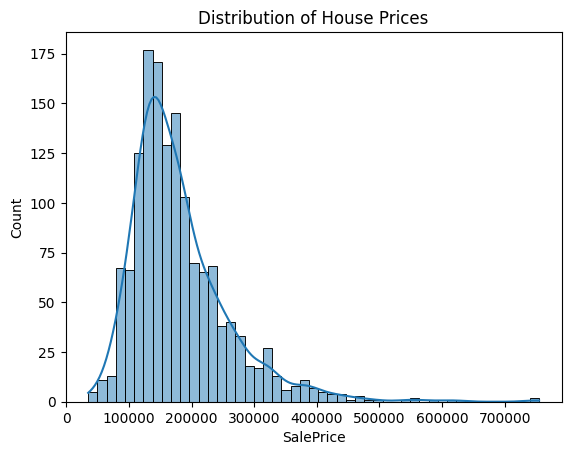

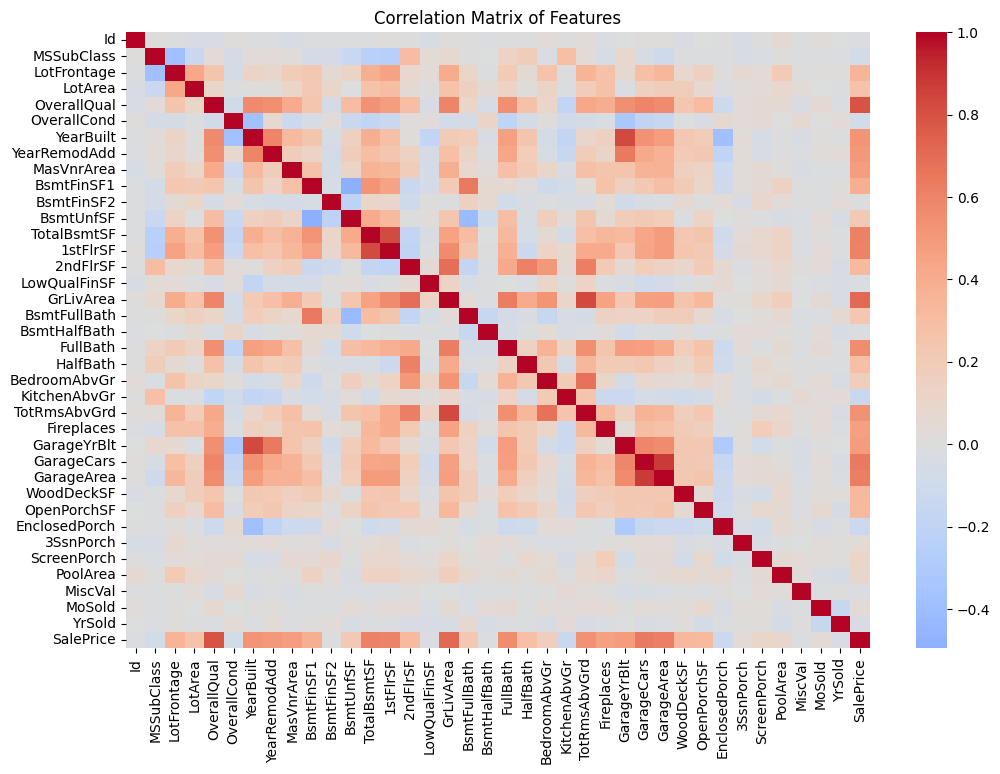

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [13]:
# 1. Exploratory Data Analysis (EDA)

# Check basic info of the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Visualize the distribution of SalePrice (target variable)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Plot the correlation matrix to find the features that are highly correlated with SalePrice
# Only select numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# Display the top 10 most correlated features with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice.head(10))

### B. Visualize Target Variable (5 points)
Create a histogram of the target variable, `SalesPrice`

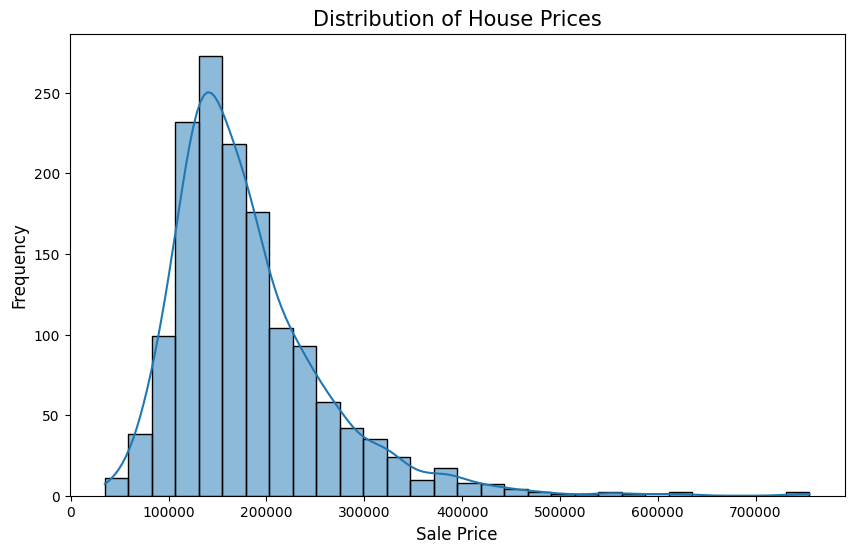

In [14]:
# Create a histogram of the SalePrice column
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of House Prices', fontsize=15)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### C. Visualize Feature (5 points)
Create a visualization of one feature:
* **GrLivArea:** Above grade (ground) living area square feet

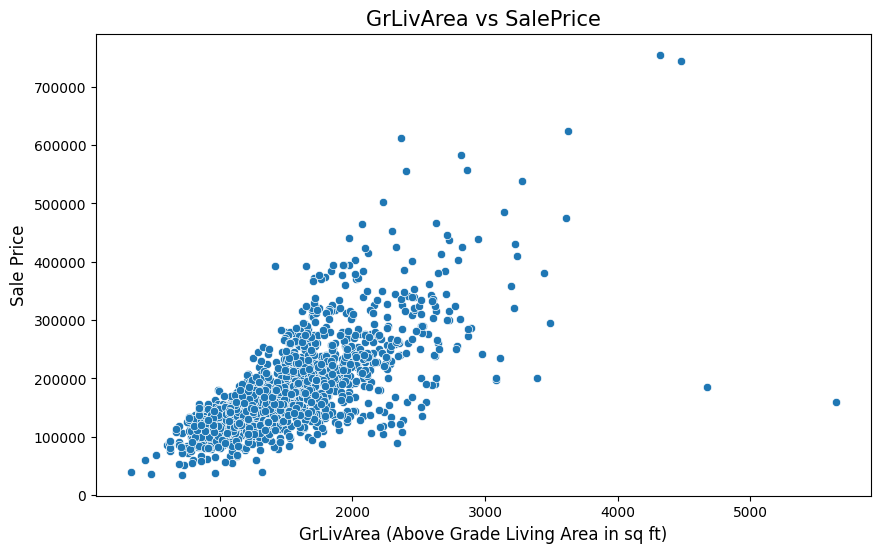

In [15]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice', fontsize=15)
plt.xlabel('GrLivArea (Above Grade Living Area in sq ft)', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.show()




### D. Fit a Simple Linear Regression Model (5 points)
Create a linear model with just one X variable input: GrLivArea.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define X and Y
X = df[['GrLivArea']]  # Single feature input as 2D array
Y = df['SalePrice']    # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Display the coefficients (slope and intercept)
print(f'Coefficient (slope): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')


Root Mean Squared Error: 58471.75652552955
Coefficient (slope): 102.48895891672333
Intercept: 24899.74815733818


### E. Score the Model (5 points)
Run predict on the fitted model. Pass the predictions to the mean squared error scoring function: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [19]:
from sklearn.metrics import mean_squared_error

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display the MSE
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 3418946311.180807


### F. Plot the Fitted Line (10 points)
Plot the X feature, GrLivArea, on the X axis and the Y label, SalesPrice, on the Y axis. Add the model line to the visualization.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


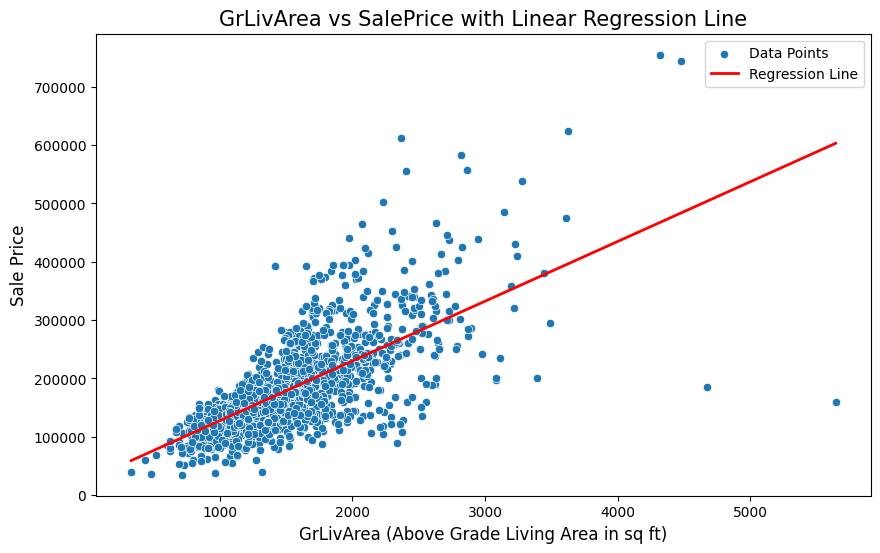

In [20]:
# Create a scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, label='Data Points')

# Add the regression line
# Generate predictions for the entire range of GrLivArea
x_range = np.linspace(df['GrLivArea'].min(), df['GrLivArea'].max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)

# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

# Set plot title and labels
plt.title('GrLivArea vs SalePrice with Linear Regression Line', fontsize=15)
plt.xlabel('GrLivArea (Above Grade Living Area in sq ft)', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.legend()
plt.show()

**Question (5 points):** What is the weight and bias or your model? What is the formula?

YOUR ANSWER:
In the context of a linear regression model, the weight (or coefficient) and bias (or intercept) define the linear relationship between the input feature and the target variable.

The general formula for a simple linear regression model with one feature can be expressed as:
SalePrice = w * GrLivArea + b


In [21]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 24899.74815733818
Coefficients: [102.48895892]


### G. Add More Features (20 points)

The goal of this exercise is to compile a table of results -- MSE computed for 5 models:
1. features = GrLivArea
2. features = GrLivArea, Feature2
3. features = GrLivArea, Feature2, Feature3
4. features = GrLivArea, Feature2, Feature3, Feature4

Select 4 additional features of your personal choice.

In [26]:
# Define the additional features of personal choice
additional_features = ['OverallQual', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

# Initialize a dictionary to store the results
results = {}

# Define the base feature
base_feature = ['GrLivArea']

# Define the feature combinations to test
feature_combinations = [
    base_feature,
    base_feature + additional_features[:1],  # GrLivArea, OverallQual
    base_feature + additional_features[:2],  # GrLivArea, OverallQual, GarageCars
    base_feature + additional_features[:3],  # GrLivArea, OverallQual, GarageCars, TotalBsmtSF
    base_feature + additional_features        # GrLivArea, OverallQual, GarageCars, TotalBsmtSF, YearBuilt
]

# Iterate through the feature combinations
for features in feature_combinations:
    # Define X and Y
    X = df[features]
    Y = df['SalePrice']

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Create the linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred = model.predict(X_test)

    # Compute the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Store the results
    results[f'Model with features: {", ".join(features)}'] = mse

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Squared Error'])
print(results_df)


                                               Model  Mean Squared Error
0                     Model with features: GrLivArea        3.418946e+09
1        Model with features: GrLivArea, OverallQual        1.950071e+09
2  Model with features: GrLivArea, OverallQual, G...        1.851766e+09
3  Model with features: GrLivArea, OverallQual, G...        1.602915e+09
4  Model with features: GrLivArea, OverallQual, G...        1.581120e+09


**Question:** Enter your model results in the grid below

*Written answer:*

                                          Model  Mean Squared Error
0                     Model with features: GrLivArea        3.418946e+09
1        Model with features: GrLivArea, OverallQual        1.950071e+09
2  Model with features: GrLivArea, OverallQual, G...        1.851766e+09
3  Model with features: GrLivArea, OverallQual, G...        1.

```

```

602915e+09
4  Model with features: GrLivArea, OverallQual, G...        1.581120e+09